# TITANIC V2

### 1. Importamos librerias necesarias


In [458]:
#Importamos librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as pt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

### 1.1 Leemos archivo *.csv y observammos las variables

In [459]:
# importamos fragmento del dataset

df = pd.read_csv('titanic.csv')

In [460]:
#vemos el contenido el dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1.2 Significado de cada variable(columna)

**PassengerId** : Identificación única del pasajero.  

**Survived** : Indica si ha sobrevivido (1) o no (0).  

**Pclass** : Indica la clase en la que viajaba.  

**Name** : Nombre del pasajero.  

**Sex** : Indica si era hombre o mujer.  

**Age** : Indica la edad.  

**SibSp** : Indica el número de hermanos o cónyuges que viajaban con el pasajero.  

**Parch** : Indica el número de familiares directos viajaban con el pasajero.  

**Ticket** : Número de ticket del pasajero.  

**Fare** : Indica el precio del pasaje.  

**Cabin** : Es el camarote asignado al pasajero.  

**Embarked** : Indica el puerto desde donde embarcó el pasajero.  

### 1.3 Mostramos algo más de información de las variables

In [461]:
# mostramos el "N" valor
print('Dimensiones: ',df.shape)

Dimensiones:  (891, 12)


In [462]:
# mostramos la columnas del dataset
print('Variables en el dataset: ', df.columns)

Variables en el dataset:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [463]:
# mostramos las 5 primeras filas
print('Primeras 5 filas',df.head())

Primeras 5 filas    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [464]:
# mostramos 5 últimas filas
print('Últimas 5 filas: ', df.tail())


Últimas 5 filas:       PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [465]:
# mostramos el tipo de variables que contiene el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Los tipos de las variables son enteros(int), decimales(float) y  objeto(strings), de momento, podemos cambiar la edad a entero.  Pero hay que eliminar los valores NULL antes de nada. 

In [466]:
#veamos las variables numericas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [467]:
# vamos a ver los valores NULL que contiene el dataset
df.isnull().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Vemos el porcentaje de nulos por cada variable, observamos que 'Age', 'Cabin' y 'Embarked' son las variables que contienen valores NULL.

### 1.4 Vamos a realizar un gráfico para que visualmente sea más sencillo de observar.

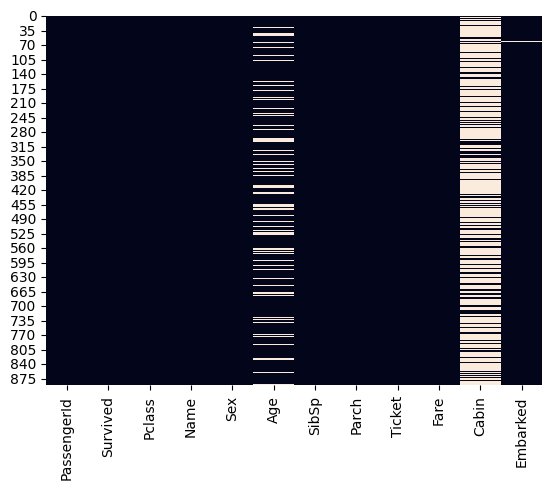

In [468]:
# veamos los valores NULL
sns.heatmap(df.isnull(), cbar=False);

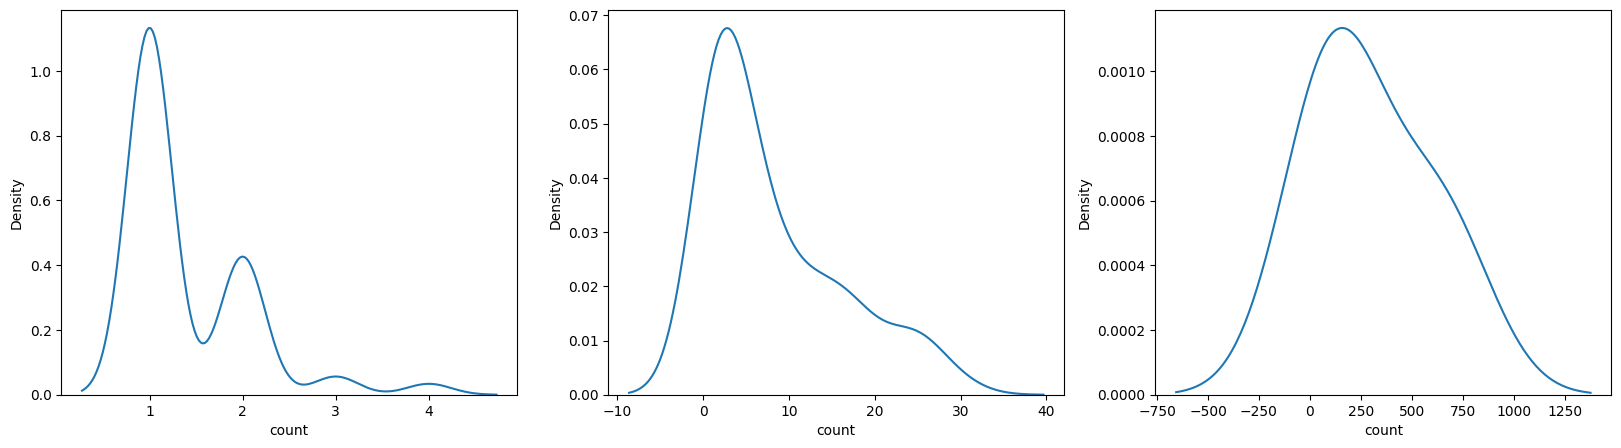

In [469]:
# de las tres variables que nos han dado NULL, las representamos de manera visual y nos hacemos una idea
fig, ax= plt.subplots(1, 3, figsize=(20,5))
sns.kdeplot(df['Cabin'].value_counts(), ax = ax[0])
sns.kdeplot(df['Age'].value_counts(), ax = ax[1])
sns.kdeplot(df['Embarked'].value_counts(), ax = ax[2]);

### 1.5 Vamos a proceder a eliminar los valores NULL

In [470]:
# utilizamos una funcion para eliminarlos
def input_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else: 
            df[col] = df[col].fillna(df[col].median())
    return df
    
df = input_missing_values(df)

In [471]:
#comprobamos la eficiencia de la función
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

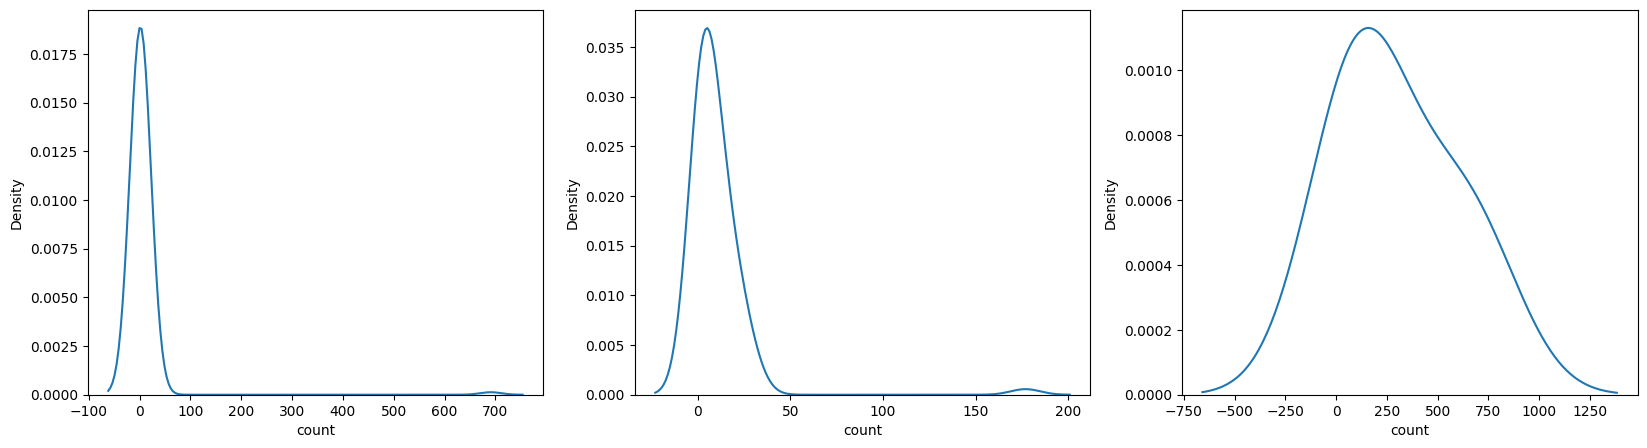

In [472]:
# vemos los gráficos de las tres variables ahora sin NULL
fig, ax= plt.subplots(1, 3, figsize=(20,5))
sns.kdeplot(df['Cabin'].value_counts(), ax = ax[0])
sns.kdeplot(df['Age'].value_counts(), ax = ax[1])
sns.kdeplot(df['Embarked'].value_counts(), ax = ax[2]);

#### Las dos primeras 'Cabin' y 'Age' notamos que su campana se ha desplazado a la izquierda se acercan más a 0, mientras que la variable 'Embarked' no tiene un cambio significativo.

In [473]:
# vamos a cambiar de tipo la variable 'Age'
df['Age'] = df['Age'].astype(int).round(2)


In [474]:
#dejamos con dos decimales la variable 'Fare'
df['Fare'] = df['Fare'].astype(float).round(2)

### 1.6 Cambio de nombre de variables

In [475]:
# vamos a renombrar las variables para tener mayor legibilidad en nuestro dataset
df.rename({'Survived':'Superviviente', 'Pclass':'Clase','Name':'Nombre','Sex':'Sexo','Age':'Edad','SibSp':'Hermacon','Parch':'Numfamilia','Fare':'Precio_pasaje','Embarked':'Puerta_embarque'}, axis=1, inplace=True)
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Ticket,Precio_pasaje,Cabin,Puerta_embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.45,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C


#### No hemos traducido ni 'Ticket' ni 'Cabin' pues las vamos a eliminar con el comando DROP.   Pero si hemos cambiado los familiares directos por 'Numfamilia' y por 'Hermacon' a la cantidad de hermanos/cónyuges del pasajero.

In [476]:
# no son variables con mucha importancia y además 'Cabin' tiene muchos valores repetidos
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)


In [477]:
# vamos a traducir algunos de los valores de dentro de las columnas
df['Sexo'] = df['Sexo'].str.replace('female', 'Mujer').str.replace('male', 'Hombre')
df['Puerta_embarque'] = df['Puerta_embarque'].str.replace('S','Southamptom').str.replace('C','Cherbourg').str.replace('Q','Queenstown')
# nos hemos dado cuenta de que necesitamos cambiar el tipo de variable para poder renombrar los valores
df['Superviviente'] = df['Superviviente'].astype(str)
df['Superviviente'] = df['Superviviente'].str.replace('1','Vivo').str.replace('0','Muerto')
#cambiamos el tipo de 'Clase' a string para poder cambiar los valores internos
df['Clase'] = df['Clase'].astype(str)
df['Clase'] = df['Clase'].str.replace('1','Primera').str.replace('2','Segunda').str.replace('3','Tercera')

In [478]:
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22,1,0,7.25,Southamptom
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38,1,0,71.28,Cherbourg
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26,0,0,7.92,Southamptom
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35,1,0,53.10,Southamptom
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35,0,0,8.05,Southamptom
...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27,0,0,13.00,Southamptom
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19,0,0,30.00,Southamptom
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29,1,2,23.45,Southamptom
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26,0,0,30.00,Cherbourg


## 2. Vamos a separar las variables y a empezar el EDA

In [479]:
# creamos variables nuevas que contienen las columnas numericas y las categóricas
df_num = ['Edad','Hermacon','Numfamilia','Precio_pasaje']
df_cat = ['Superviviente','Clase','Sexo', 'Puerta_embarque']


In [480]:
# gráficamos las variables numéricas

fig = make_subplots(rows=1, cols=4)

for i, col in enumerate(df_num):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}'), row=1, col=i+1 )

fig.update_layout(height=450, width=1000, title_text="Distribución Variables Numéricas", showlegend=True)
fig.show()

In [481]:
# graficamos las variables categóricas
fig = make_subplots(rows=2, cols=2, subplot_titles=df_cat)

for i, col in enumerate(df_cat):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Histogram(x=df[df_cat[i]], nbinsx=20, name=f'Distribución de {df_cat[i]}'), row=row, col=col)

fig.update_yaxes(showticklabels=False, row=2, col=2)

fig.update_layout(height=600, width=700, title_text="Distribución Variables categóricas", showlegend=False)
fig.update_xaxes(tickangle=45)
fig.show()

In [482]:
#prueba cruce datos
pd.pivot_table(df, index= ['Sexo','Puerta_embarque'], columns=['Superviviente','Clase'], values=['Precio_pasaje'],fill_value='0')

/var/folders/vv/nl4zd9j90c350_nh6_x319y40000gn/T/ipykernel_51337/3493401029.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Precio_pasaje                                    \
Superviviente                 Muerto                              Vivo   
Clase                        Primera    Segunda    Tercera     Primera   
Sexo   Puerta_embarque                                                   
Hombre Cherbourg             80.8464   25.41875   8.720000  112.197647   
       Queenstown               90.0      12.35  11.840833           0   
       Southamptom         53.563529  18.997561  12.759307   51.832857   
Mujer  Cherbourg               28.71          0  14.652500  117.709762   
       Queenstown                  0          0  10.904444        90.0   
       Southamptom            151.55      18.25  21.970000   96.045833   

                                              
Superviviente                                 
Clase                     Segunda    Tercera  
Sexo   Puerta_embarque                        
Hombre Cherbourg            25.43  11.437000  
       Queenstown               0  12.916667  
       Southamptom      20.516667  17.033824  
Mujer  Cherbourg        25.268571  14.717333  
       Queenstown           12.35  10.084167  
       Southamptom      22.272951  13.171515

In [483]:
#relación supervivientes por edad según la clase en la que viajaban
fig = px.box(df, x='Clase', y='Edad', 
             title='Relación supervivientes por edad según la clase en la que viajaban', 
             
             template="plotly_dark", color='Superviviente') # añadimos color para diferenciar mejor los supervivientes

fig.show()

#### Podemos observar que hay outliers de la variable 'Edad'. Vamos a limpiar esos valores tan lejanos como por ejemplo el pasajero de 80 años de edad

## 2.1 Limpiamos outliers de la variable 'Edad'

In [484]:
#función que limpiar outliers
def reemplazar_outliers_iqr(df, columnas):
    """
    Reemplazamos los outliers del  df usando el método IQR.
    """
    for columna in columnas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
        df[columna] = np.where(df[columna] < (Q1 - 1.5 * IQR), Q1, df[columna])
        df[columna] = np.where(df[columna] > (Q3 + 1.5 * IQR), Q3, df[columna])
        
    return df

columnas_a_limpiar = ['Edad']  #  poner aquí las columnas que desees limpiar
df_limpio = reemplazar_outliers_iqr(df, columnas_a_limpiar)

#### Volvemos a graficar para ver el resultado de la función replazar ouliers

In [485]:
# ya no vemos tanta distancia entre edades
fig = px.box(df_limpio, x='Clase', y='Edad', 
             title='Relación supervivientes por edad según la clase en la que viajaban(sin outliers)', 
             
             template="plotly_dark", color='Superviviente') # añadimos color para diferenciar mejor los supervivientes

fig.show()

In [486]:
# selecionamos la clase y el sexo de los pasajeros que viajaban en el barco
pasajeros_clase = df.groupby(['Clase', 'Sexo']).size().reset_index(name='Pasajeros') 

fig = px.treemap(pasajeros_clase, path=['Clase', 'Sexo'], values='Pasajeros', title='Cantidad de pasajeros por Clase y por Sexo', template="plotly_dark")
fig.show()

#### Nos muestra el total de pasajeros por clase y por sexo de nuestro fragmento de dataset

In [487]:
# gráfico en forma de tarta(pie) donde vemos el porcentaje de supervivientes
sobrevive = df['Superviviente'].value_counts().index.tolist()
fig = px.pie(df[df['Superviviente'].isin(sobrevive)], 'Superviviente', height=400 , title='Procentaje de supervivientes', template="plotly_dark")

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

#### Podemos observar que hay una menor cantidad de supervivientes que forman parte del dataset

In [488]:
#relación supervivientes según el sexo

fig = px.bar(df, x="Superviviente", y='PassengerId', color='Sexo',title='Supervivencia entre hombres y mujeres')
fig.show()

#### Se puede comprobar que la supervivencia es menor que la de fallecidos y además hay una mortalidad mayor en hombres que mujeres.

In [489]:
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom
...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg


## 2.2 Vamos a realizar consultas sobre el número de familiares a bordo

In [490]:
# calculamos los pasajeros con familia directa(padres e hijos) y los metemos en una variable
num_fami=df[(df['Numfamilia']>0) & (df['Numfamilia']<10)]

# calculamos los pasajeros que viajan sin familia directa
num_fami_none =df[df['Numfamilia'] == 0]


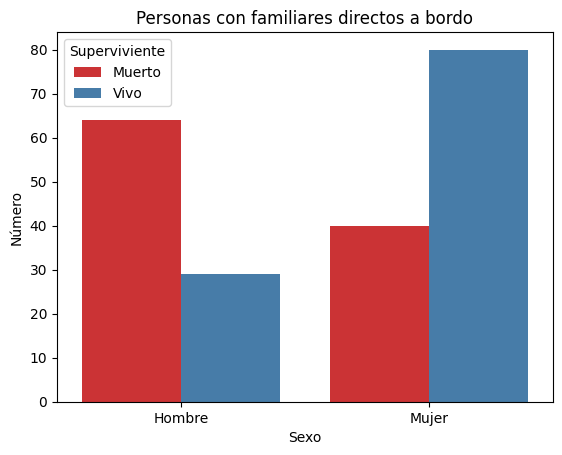

In [491]:
# Número de pasajeros que viajaban con familiares directos según el sexo 

graf1 = sns.countplot(num_fami, x='Sexo', hue='Superviviente', palette='Set1')
graf1.set_title('Personas con familiares directos a bordo')
graf1.set_xlabel('Sexo')
graf1.set_ylabel('Número');


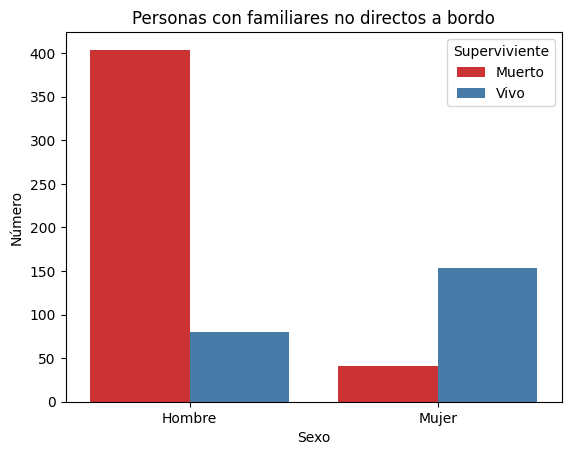

In [492]:
# Número de pasajeros que viajaban sin familiares directos según el sexo
graf2 = sns.countplot(num_fami_none, x='Sexo', hue='Superviviente', palette='Set1')
graf2.set_title('Personas con familiares no directos a bordo')
graf2.set_xlabel('Sexo')
graf2.set_ylabel('Número');

#### Al poner los dos gráficos juntos podemos observar que hay más mujeres supervivientes con familiares directos a bordo, por lo tanto hay una cantidad enorme de hombres que fallecieron con y sin familiares directos.  

In [493]:
#Creamos una nueva columna llamada 'Estado' que suma los familiares de los pasajeros con solo(0) y acompañados(1+)
df['Estado']=df['Hermacon'] + df['Numfamilia']
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom,1
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg,1
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom,0
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom,1
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom,0
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom,0
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom,3
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg,0


### Vamos a sumar las dos columnas de personas con familiares a bordo para estudiar más a fondo la supervivencia de las mujeres según ciertos aspectos.

In [494]:
# cambiamos el tipo de la nueva columna 'Estado'
df['Estado']= df['Estado'].astype(str)

In [495]:
# cambiamos el nombre de los valores de la columna 'Estado'
df['Estado'] = df['Estado'].str.replace('10' ,'Acompañado').str.replace('2' ,'Acompañado').str.replace('3' ,'Acompañado').str.replace('4' ,'Acompañado').str.replace('5' ,'Acompañado').str.replace('6' ,'Acompañado').str.replace('7' ,'Acompañado').str.replace('8' ,'Acompañado').str.replace('9' ,'Acompañado').str.replace('1' ,'Acompañado').str.replace('0','Solo')

In [496]:
#podemos observar los pasajeros que viajan solos y los que no
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom,Acompañado
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg,Acompañado
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom,Solo
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom,Acompañado
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom,Solo
...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom,Solo
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom,Solo
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom,Acompañado
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg,Solo


#### Al unir las columnas 'Hermacon' y 'Numfamilia' podemos comprobar qué pasajeros viajan en un estado de soledad o acompañamiento.

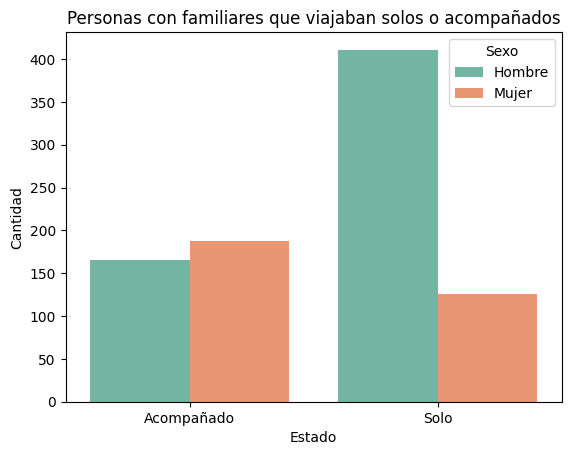

In [497]:
 # vamos a comprobar los supervivientes según el estado del pasajero

graf3= sns.countplot(data =df, x='Estado', hue='Sexo', palette='Set2')
graf3.set_title('Personas con familiares que viajaban solos o acompañados')
graf3.set_xlabel('Estado')
graf3.set_ylabel('Cantidad');

#### En esta gráfica vemos la cantidad de pasajeros que viajaban acompañadas o solas. Esta gráfica nos deduce que una gran catidad de hombres viajaban solos

## 2.3 Una vez ya tenemos el filtro de hombres y mujeres , vamos a centrarnos en intentar explicar el por qué de la supervivencia

In [513]:
# con cut podemos separar por rango de edad, con el bins indicamos los rangos y luego los nombramos 

df['Rango_Edad']=pd.cut(df['Edad'], bins=[0,12,50,100],labels=['Menores', 'Adultos', 'Mayores'])
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado,Rango_Edad
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom,Acompañado,Adultos
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg,Acompañado,Adultos
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom,Solo,Adultos
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom,Acompañado,Adultos
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom,Solo,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom,Solo,Adultos
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom,Solo,Adultos
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom,Acompañado,Adultos
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg,Solo,Adultos


## 2.4 Vamos a comparar los supervivientes hombres y mujeres por un rango de edad.

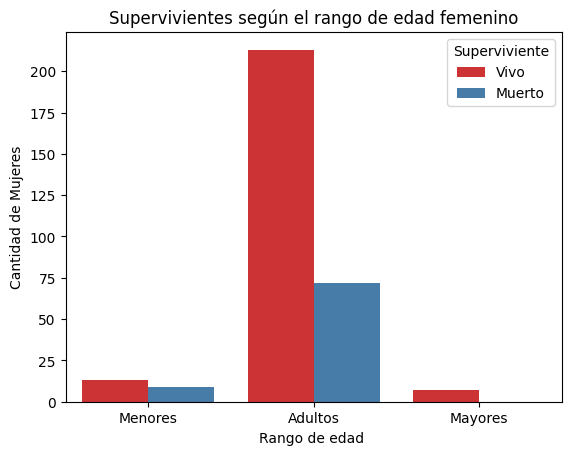

In [514]:
# primero seleccionamos a todas las mujeres
female = df[df['Sexo']== 'Mujer']
# despúes generamos un gráfico con el rango de edad y la supervivencia de las mujeres
graf4= sns.countplot(data =female, x='Rango_Edad', hue='Superviviente', palette='Set1') 
graf4.set_title('Supervivientes según el rango de edad femenino')
graf4.set_xlabel('Rango de edad ')
graf4.set_ylabel('Cantidad de Mujeres');


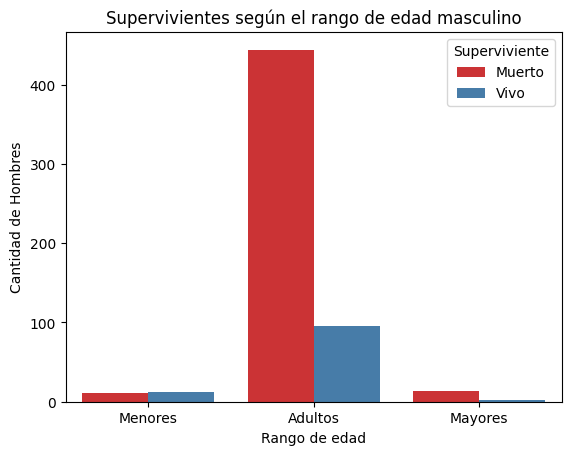

In [515]:
# segundo, seleccionamos a todos los hombres
male = df[df['Sexo']== 'Hombre']
# despúes generamos un gráfico con el rango de edad y la supervivencia de las mujeres
graf5= sns.countplot(data =male, x='Rango_Edad', hue='Superviviente', palette='Set1') 
graf5.set_title('Supervivientes según el rango de edad masculino')
graf5.set_xlabel('Rango de edad')
graf5.set_ylabel('Cantidad de Hombres');

#### Al comparar las dos gráficas entre hombres y mujeres vemos que la cantidad de mujeres que sobrevive es mucho mayor en el rango de edad 'Adultos' siendo los hombres los más catigados por el naufrágio. Pero, ¿por qué ocurre esto?.


In [501]:
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado,Rango_Edad
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom,Acompañado,Adultos
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg,Acompañado,Adultos
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom,Solo,Adultos
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom,Acompañado,Adultos
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom,Solo,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom,Solo,Adultos
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom,Solo,Adultos
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom,Acompañado,Adultos
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg,Solo,Adultos


## 2.5 Vamos a comparar la supervivencia entre hombres y mujeres los cuales viajaban solos o acompañados.

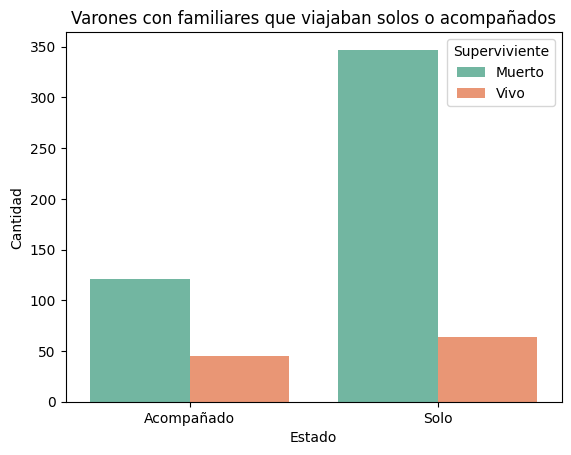

In [510]:
# hombres supervivientes que viajaban acompañadas
graf6= sns.countplot(data =male, x='Estado', hue='Superviviente', palette='Set2')
graf6.set_title('Varones con familiares que viajaban solos o acompañados')
graf6.set_xlabel('Estado')
graf6.set_ylabel('Cantidad');

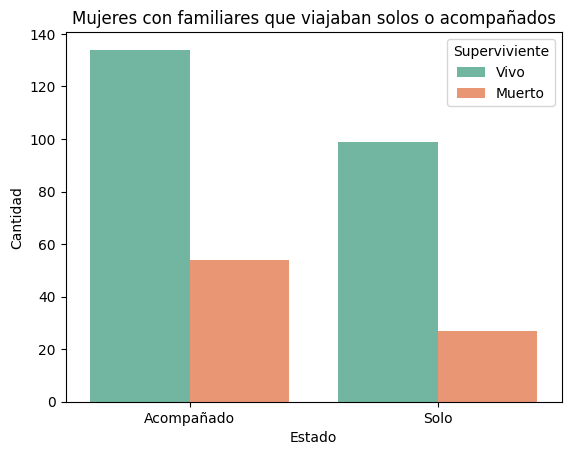

In [511]:
# mujeres supervivientes que viajaban acompañadas
graf7= sns.countplot(data =female, x='Estado', hue='Superviviente', palette='Set2')
graf7.set_title('Mujeres con familiares que viajaban solos o acompañados')
graf7.set_xlabel('Estado')
graf7.set_ylabel('Cantidad');

#### Al ver los dos gráficos juntos podemos comprobar de nuevo una mayor supervivencia en las mujeres en este caso las acompañadas(hijos sobre todo)

## 2.6 Vamos a comparar los supervivientes hombres y mujeres según los factores edad, clase, precio billete.

In [504]:
#vamos a ver la supervivencia de las mujeres según la edad, clase y precio del billete
fig = px.scatter_3d(female, x='Superviviente', y='Edad', z='Precio_pasaje',
              color='Clase')
fig.show()

#### Nótese en este gráfico 3D ciertos valores como la edad , el precio del billete y la clase, mostrando que las mujeres de alto estatus social sobrevivieron más que las de tercera clase.

In [505]:
#vamos a ver la supervivencia de los hombres según la edad, clase y precio del billete
fig = px.scatter_3d(male, x='Superviviente', y='Edad', z='Precio_pasaje',
              color='Clase')
fig.show()

#### Pero en los hombres los fallecimientos están más repartidos, no importa la clase ni el estatus social. Salvo hombres con un estatus alto, daba igual de qué clase fueran.

## 3 Pruebas estadísticas

### 3.1 Shapiro-Wilk

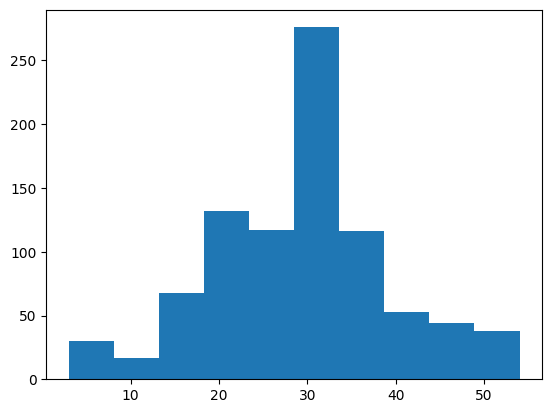

Estadístico=0.9743957357343158, p-value=2.093131062218159e-11
La variable Edad no sigue una distribución normal


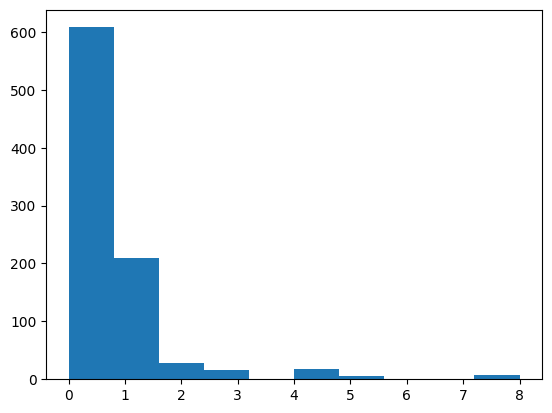

Estadístico=0.5129657630388483, p-value=5.750830636609992e-44
La variable Hermacon no sigue una distribución normal


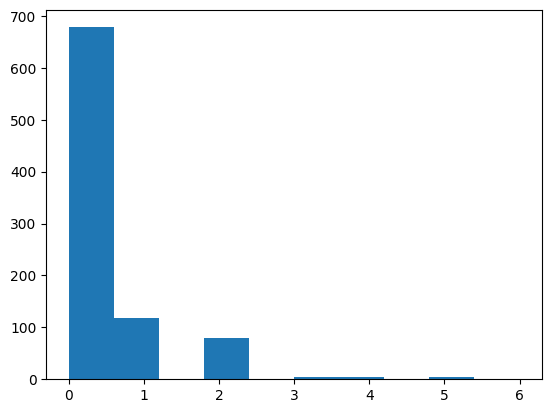

Estadístico=0.5328139355786152, p-value=2.3866222471723583e-43
La variable Numfamilia no sigue una distribución normal


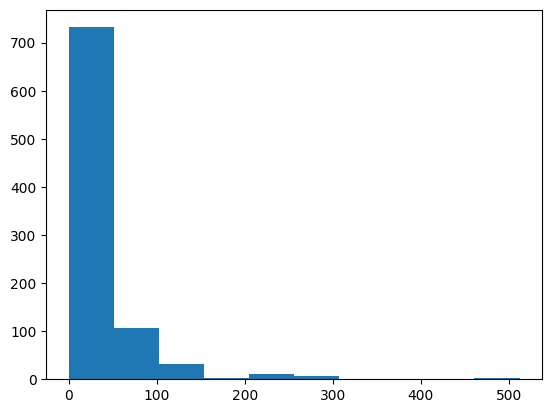

Estadístico=0.5218928370086067, p-value=1.0841636135201796e-43
La variable Precio_pasaje no sigue una distribución normal


In [506]:
# Vamos a realizar la prueba de Shapiro para conocer si las columnas numericas siguen o no una distribucion normal.
for columnas in df_num:
    plt.hist(df[columnas])
    plt.show()
    stat, p = shapiro(df[columnas])
    print(f'Estadístico={stat}, p-value={p}')
    
    if p < 0.05:
        print(f'La variable {columnas} no sigue una distribución normal')
    else:
        print(f'La variable {columnas} sigue una distribución normal')


#### Como podemos comprobar no ninguna de las variables numéricas sigue una distribución normal por lo que habría que seguir una correlación de Spearman. 

## 3. Correlación entre variables

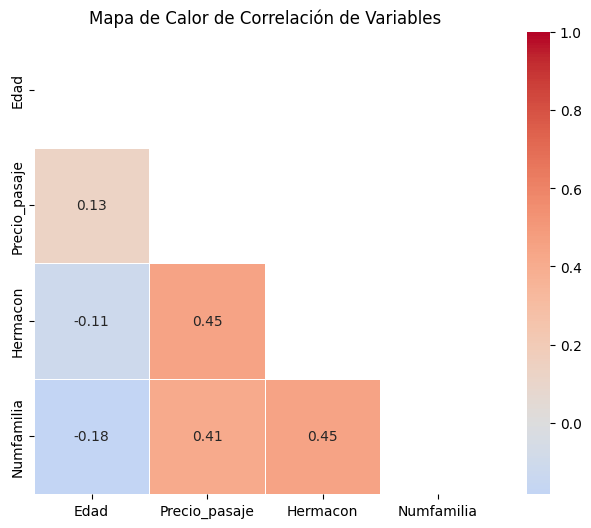

In [507]:
var_corr = ['Edad','Hermacon', 'Numfamilia', 'Precio_pasaje']
 
# Filtrar el DataFrame para incluir solo las variables especificadas
listing_filtered = df[var_corr]

# Calcular la matriz de correlación de Spearman, ya que no sigue una distribución normal
correlation_matrix = listing_filtered.corr(method='spearman').sort_values(by='Edad', axis=0, ascending=False).sort_values(by='Edad', axis=1, ascending=False)
# generamos la mascara de la mitad diagonal del gráfico hacia arriba 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white',vmax=1,center=0, square=True)
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

#### Con las variables numéricas que tenemos no hay buena correlación, en todas hay una leve correlación.  

In [447]:
df.columns

Index(['PassengerId', 'Superviviente', 'Clase', 'Nombre', 'Sexo', 'Edad',
       'Hermacon', 'Numfamilia', 'Precio_pasaje', 'Puerta_embarque', 'Estado',
       'Rango_Edad'],
      dtype='object')

In [508]:
df

,PassengerId,Superviviente,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado,Rango_Edad
0,1,Muerto,Tercera,"Braund, Mr. Owen Harris",Hombre,22.0,1,0,7.25,Southamptom,Acompañado,Adultos
1,2,Vivo,Primera,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mujer,38.0,1,0,71.28,Cherbourg,Acompañado,Adultos
2,3,Vivo,Tercera,"Heikkinen, Miss. Laina",Mujer,26.0,0,0,7.92,Southamptom,Solo,Adultos
3,4,Vivo,Primera,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mujer,35.0,1,0,53.10,Southamptom,Acompañado,Adultos
4,5,Muerto,Tercera,"Allen, Mr. William Henry",Hombre,35.0,0,0,8.05,Southamptom,Solo,Adultos
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,Muerto,Segunda,"Montvila, Rev. Juozas",Hombre,27.0,0,0,13.00,Southamptom,Solo,Adultos
887,888,Vivo,Primera,"Graham, Miss. Margaret Edith",Mujer,19.0,0,0,30.00,Southamptom,Solo,Adultos
888,889,Muerto,Tercera,"Johnston, Miss. Catherine Helen ""Carrie""",Mujer,29.0,1,2,23.45,Southamptom,Acompañado,Adultos
889,890,Vivo,Primera,"Behr, Mr. Karl Howell",Hombre,26.0,0,0,30.00,Cherbourg,Solo,Adultos


In [509]:
#hacemos una copia para luego trabajar en Power Bi
dfpw=df.copy()
dfpw.to_csv('tinaticpwbi.csv')

## 4. Modelo de regresión : Clasificación

In [448]:
#Encodeamos las variables categóricas y estandarizamos las numéricas
from sklearn.preprocessing import  StandardScaler, LabelEncoder

cat_cols = df.select_dtypes(include='object').columns #seleccionamos las columnas categóricas
num_cols = df.select_dtypes(include='float64').columns #seleccionamos las columnas numéricas

le = LabelEncoder() #creamos el objeto LabelEncoder
for cat in cat_cols: #para cada columna categórica
    df[cat] = le.fit_transform(df[cat]) #aplicamos el LabelEncoder
    name_mapping = {label: idx for idx, label in enumerate(le.classes_)} #creamos un diccionario con los valores originales
    print(name_mapping) #imprimimos el diccionario


df[num_cols] = StandardScaler().fit_transform(df[num_cols]) #estandarizamos las columnas numéricas

{'Muerto': 0, 'Vivo': 1}
{'Primera': 0, 'Segunda': 1, 'Tercera': 2}
{'Abbing, Mr. Anthony': 0, 'Abbott, Mr. Rossmore Edward': 1, 'Abbott, Mrs. Stanton (Rosa Hunt)': 2, 'Abelson, Mr. Samuel': 3, 'Abelson, Mrs. Samuel (Hannah Wizosky)': 4, 'Adahl, Mr. Mauritz Nils Martin': 5, 'Adams, Mr. John': 6, 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)': 7, 'Aks, Mrs. Sam (Leah Rosen)': 8, 'Albimona, Mr. Nassef Cassem': 9, 'Alexander, Mr. William': 10, 'Alhomaki, Mr. Ilmari Rudolf': 11, 'Ali, Mr. Ahmed': 12, 'Ali, Mr. William': 13, 'Allen, Miss. Elisabeth Walton': 14, 'Allen, Mr. William Henry': 15, 'Allison, Master. Hudson Trevor': 16, 'Allison, Miss. Helen Loraine': 17, 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)': 18, 'Allum, Mr. Owen George': 19, 'Andersen-Jensen, Miss. Carla Christine Nielsine': 20, 'Anderson, Mr. Harry': 21, 'Andersson, Master. Sigvard Harald Elias': 22, 'Andersson, Miss. Ebba Iris Alfrida': 23, 'Andersson, Miss. Ellis Anna Maria': 24, 'Andersson, Miss. Erna Alexandra

In [449]:
# vamos a elegir nuestra variable estrella en este caso es 'Sexo'
y = df.Superviviente

In [450]:
#tiramos las columnas innecesarias para poder hacer la normalización
df.drop(['Rango_Edad','Superviviente'],axis=1, inplace=True)

### 4.1 Normalización

In [451]:
# Normalizamos después de encodear
def normaliza(df_encoded):
    for col in df_encoded:
        df_encoded[col]=(df_encoded[col]-df_encoded[col].mean())/df_encoded[col].std()
    return df_encoded
 
X = normaliza(df)

In [452]:
X

,PassengerId,Clase,Nombre,Sexo,Edad,Hermacon,Numfamilia,Precio_pasaje,Puerta_embarque,Estado
0,-1.729137,0.826913,-1.309481,-0.737281,-0.687426,0.432550,-0.473408,-0.502166,0.585625,-1.230954
1,-1.725251,-1.565228,-0.990854,1.354813,0.921760,0.432550,-0.473408,0.786334,-1.941213,-1.230954
2,-1.721365,0.826913,-0.357484,1.354813,-0.285129,-0.474279,-0.473408,-0.488684,0.585625,0.811467
3,-1.717480,-1.565228,-0.672226,1.354813,0.620038,0.432550,-0.473408,0.420491,0.585625,-1.230954
4,-1.713594,0.826913,-1.670851,-0.737281,0.620038,-0.474279,-0.473408,-0.486068,0.585625,0.811467
...,...,...,...,...,...,...,...,...,...,...
886,1.713594,-0.369158,0.400227,-0.737281,-0.184555,-0.474279,-0.473408,-0.386457,0.585625,0.811467
887,1.717480,-1.565228,-0.551769,1.354813,-0.989148,-0.474279,-0.473408,-0.044359,0.585625,0.811467
888,1.721365,0.826913,-0.124342,1.354813,0.016593,0.432550,2.007806,-0.176168,0.585625,-1.230954
889,1.725251,-1.565228,-1.414395,-0.737281,-0.285129,-0.474279,-0.473408,-0.044359,-1.941213,0.811467


#### Importamos librerias para el proceso de entrenamiento del modelo

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [454]:
# dividimos nuestras variables para el entreno ,train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.2, random_state=357) 
#train significa que es el conjunto de datos que usaremos para entrenar el modelo, test es el conjunto de datos que usaremos para evaluar el modelo

#### Utilizaremos el metodo de RandomForest ya que funciona muy bien

In [455]:
model_RF = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=2, random_state=2)
model_RF.fit(X_train, y_train) # lo entrenamos
predictions_RF = model_RF.predict(X_test)
model_RF.score(X_train,y_train)

0.8314606741573034

##### Nos ha dado muy buen resultado y en base a esto preparamos un informe

In [456]:
# Utilizamos el modelo Random Forest
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_preds = RFC.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       110
           1       0.76      0.80      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## 5. Conclusión 

#### A modo de conclusión, vemos que nos ha dado muy buenos resultado en el entrenamiento con 'RandomForest', pero sobre todo nos fijaremos en el f1-score que nos ha dado un resultado en el modelo predictivo de mortalidad de un 86% y un 78% de supervivencia, esto es devido a los elevados números de mortalidad acaecidos en la catastrofe del Titanic.